<a href="https://www.kaggle.com/code/kubraterz/stress-and-sleep-patterns?scriptVersionId=242437050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stress and Sleep Patterns
Stress and Sleep Patterns in a University at South of India

🧠 Introduction: Exploring the Relationship Between Stress and Sleep Patterns
In our fast-paced modern world, stress and sleep have become two of the most critical—and often neglected—aspects of human health. While stress is a natural response to challenges, chronic stress can severely impact our sleep quality, duration, and rhythm. In turn, poor sleep can intensify stress levels, creating a vicious cycle that affects both mental and physical well-being.

This notebook explores the intricate relationship between stress levels and sleep patterns, using real or simulated data to uncover trends, correlations, and potential insights. Our goal is to answer key questions such as:

🛌 How does increased stress affect total sleep time?

⏰ Are certain sleep stages (like REM or deep sleep) more sensitive to stress?

📈 Can we identify patterns that predict poor sleep based on daily stress indicators?

Through data exploration, visualization, and basic machine learning models, we’ll attempt to better understand how these two factors influence each other—and what that means for lifestyle, productivity, and long-term health.

Whether you're a data scientist, health researcher, or simply curious about optimizing your own well-being, this notebook is a starting point for deeper insights into how we rest and how we cope.

Let’s dive in. 🔍



# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stress-and-sleep-patterns/Stress and Sleep Patterns in a University at South of India/Dataset.xlsx


# 📂 2. Data Loading & Overview

In [2]:
# Load dataset
df=pd.read_excel('/kaggle/input/stress-and-sleep-patterns/Stress and Sleep Patterns in a University at South of India/Dataset.xlsx')

In [3]:
df.head()

,Timestamp,Gender,Age,Your major,"Have you ever been diagnosed with a mental health condition by a professional (doctor, therapist, etc.)?",Have you ever received treatment/support for a mental health problem?,When have you usually gone to bed in the past month?,How long has it taken you to fall asleep each night in the past month?,What time have you usually gotten up in the morning in the past month?,How many hours of actual sleep did you get on an average for the past month? (maybe different from the number of hours spent in bed),...,"During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Feel too hot]","During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Have bad dreams]","During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Have pain]",What is your stress level in these given situations [You have to submit an assignment in less than a day],What is your stress level in these given situations [A week before exams],What is your stress level in these given situations [Asking for an extra ketchup packet at a restaurant],What is your stress level in these given situations [Meeting a new person ],What is your stress level in these given situations [Asking for help],What is your stress level in these given situations [Confronting someone],What is your stress level in these given situations [Doing something without help]
0,2021-11-06 21:55:50.465,Male,18-20,Mechanical,No,No,9pm-11pm,30 minutes,8 -10 am,7-8 hours,...,Less than once a week,Not during the past month,Not during the past month,moderate,mild,not stressed,not stressed,not stressed,moderate,not stressed
1,2021-11-06 22:00:18.873,Non-binary,18-20,EEE/ECE,Yes,Yes,1am-3am,More time than 2 hours,after 10 am,7-8 hours,...,Once or twice a week,Three or more times a week,Three or more times a week,severe,moderate,severe,severe,severe,severe,moderate
2,2021-11-06 22:04:49.692,Non-binary,18-20,Computer Science,Yes,Yes,11pm-1am,30 minutes,before 8 am,7-8 hours,...,Not during the past month,Once or twice a week,Once or twice a week,moderate,moderate,moderate,moderate,moderate,moderate,moderate
3,2021-11-06 22:05:30.780,Female,18-20,Biotech,No,No,11pm-1am,1 hour,after 10 am,7-8 hours,...,Once or twice a week,Less than once a week,Not during the past month,severe,mild,not stressed,mild,mild,moderate,not stressed
4,2021-11-06 22:07:40.036,Female,18-20,Computer Science,Yes,No,1am-3am,30 minutes,8 -10 am,more than 8 hours,...,Less than once a week,Less than once a week,Once or twice a week,very severe,very severe,moderate,severe,very severe,very severe,very severe


In [4]:
print(df.columns)

Index(['Timestamp', 'Gender', 'Age', 'Your major',
       'Have you ever been diagnosed with a mental health condition by a professional (doctor, therapist, etc.)?',
       'Have you ever received treatment/support for a mental health problem?',
       'When have you usually gone to bed in the past month?',
       'How long has it taken you to fall asleep each night in the past month?',
       'What time have you usually gotten up in the morning in the past month?',
       'How many hours of actual sleep did you get on an average for the past month? (maybe different from the number of hours spent in bed)',
       ' During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Cannot get to sleep within 30 minutes]',
       ' During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the

In [5]:
print(df.columns.tolist())

['Timestamp', 'Gender', 'Age', 'Your major', 'Have you ever been diagnosed with a mental health condition by a professional (doctor, therapist, etc.)?', 'Have you ever received treatment/support for a mental health problem?', 'When have you usually gone to bed in the past month?', 'How long has it taken you to fall asleep each night in the past month?', 'What time have you usually gotten up in the morning in the past month?', 'How many hours of actual sleep did you get on an average for the past month? (maybe different from the number of hours spent in bed)', ' During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Cannot get to sleep within 30 minutes]', ' During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Wake up in th

In [6]:
print("First 5 records:", df.head())

First 5 records:                 Timestamp      Gender    Age        Your major  \
0 2021-11-06 21:55:50.465        Male  18-20        Mechanical   
1 2021-11-06 22:00:18.873  Non-binary  18-20           EEE/ECE   
2 2021-11-06 22:04:49.692  Non-binary  18-20  Computer Science   
3 2021-11-06 22:05:30.780      Female  18-20           Biotech   
4 2021-11-06 22:07:40.036      Female  18-20  Computer Science   

  Have you ever been diagnosed with a mental health condition by a professional (doctor, therapist, etc.)?  \
0                                                 No                                                         
1                                                Yes                                                         
2                                                Yes                                                         
3                                                 No                                                         
4                                   

# 🧹 3. Data Cleaning & Preprocessing

In [7]:
# Check for nulls
print(df.isnull().sum())

Timestamp                                                                                                                                                                                                                                            0
Gender                                                                                                                                                                                                                                               0
Age                                                                                                                                                                                                                                                  0
Your major                                                                                                                                                                                                                                           0
Have you eve

In [8]:
# Sütun adlarını küçük harfe çevir ve boşlukları kaldır
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
# Fill or drop missing values
df = df.dropna()

# 📊 4. Exploratory Data Analysis (EDA)

**A. Stress vs Total Sleep**

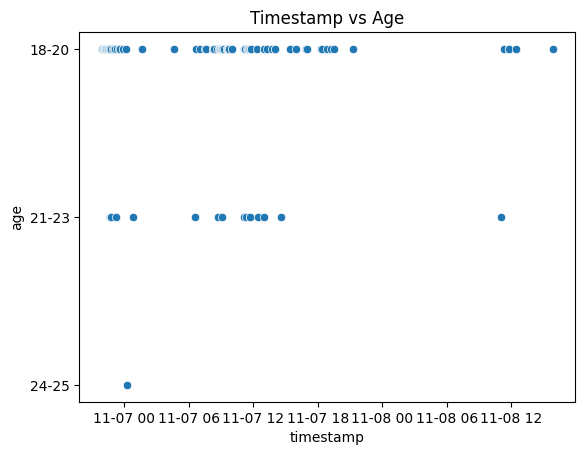

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='timestamp', y='age')
plt.title("Timestamp vs Age")
plt.show()


**B. Sleep Stage Breakdown by Stress Level**

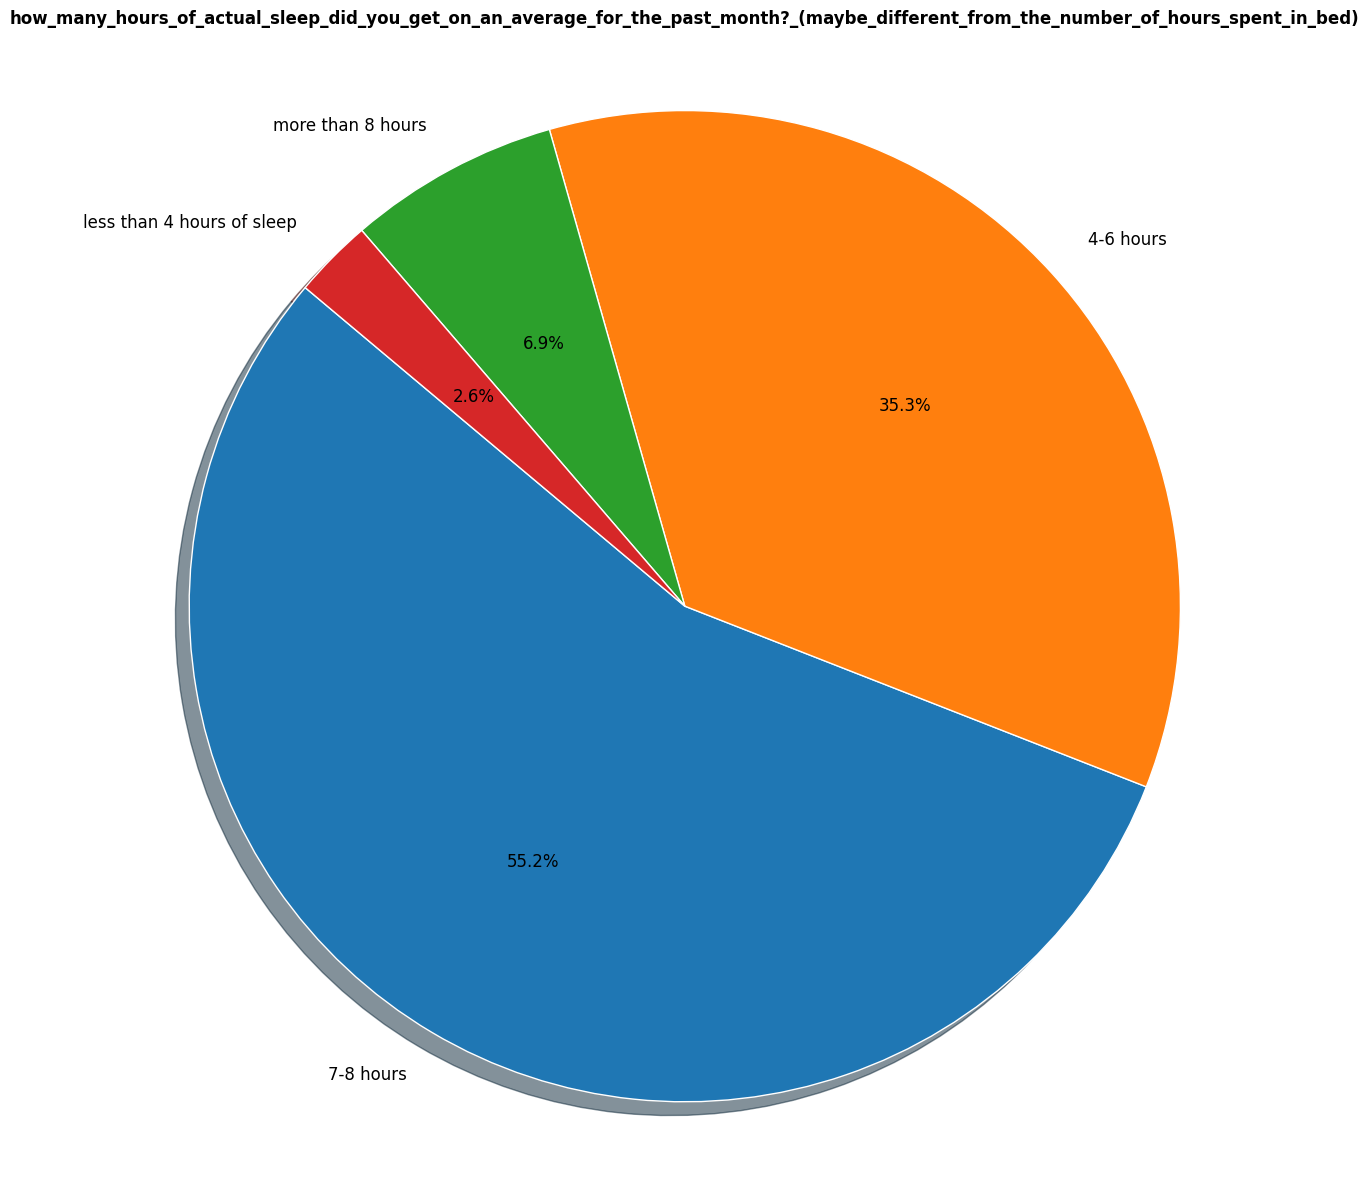

In [11]:
hours_scale = df['how_many_hours_of_actual_sleep_did_you_get_on_an_average_for_the_past_month?_(maybe_different_from_the_number_of_hours_spent_in_bed)'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(
    hours_scale.values,
    labels=hours_scale.index,
    autopct='%1.1f%%',
    startangle=140,
 
    shadow=True,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('how_many_hours_of_actual_sleep_did_you_get_on_an_average_for_the_past_month?_(maybe_different_from_the_number_of_hours_spent_in_bed)', fontsize=12, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()


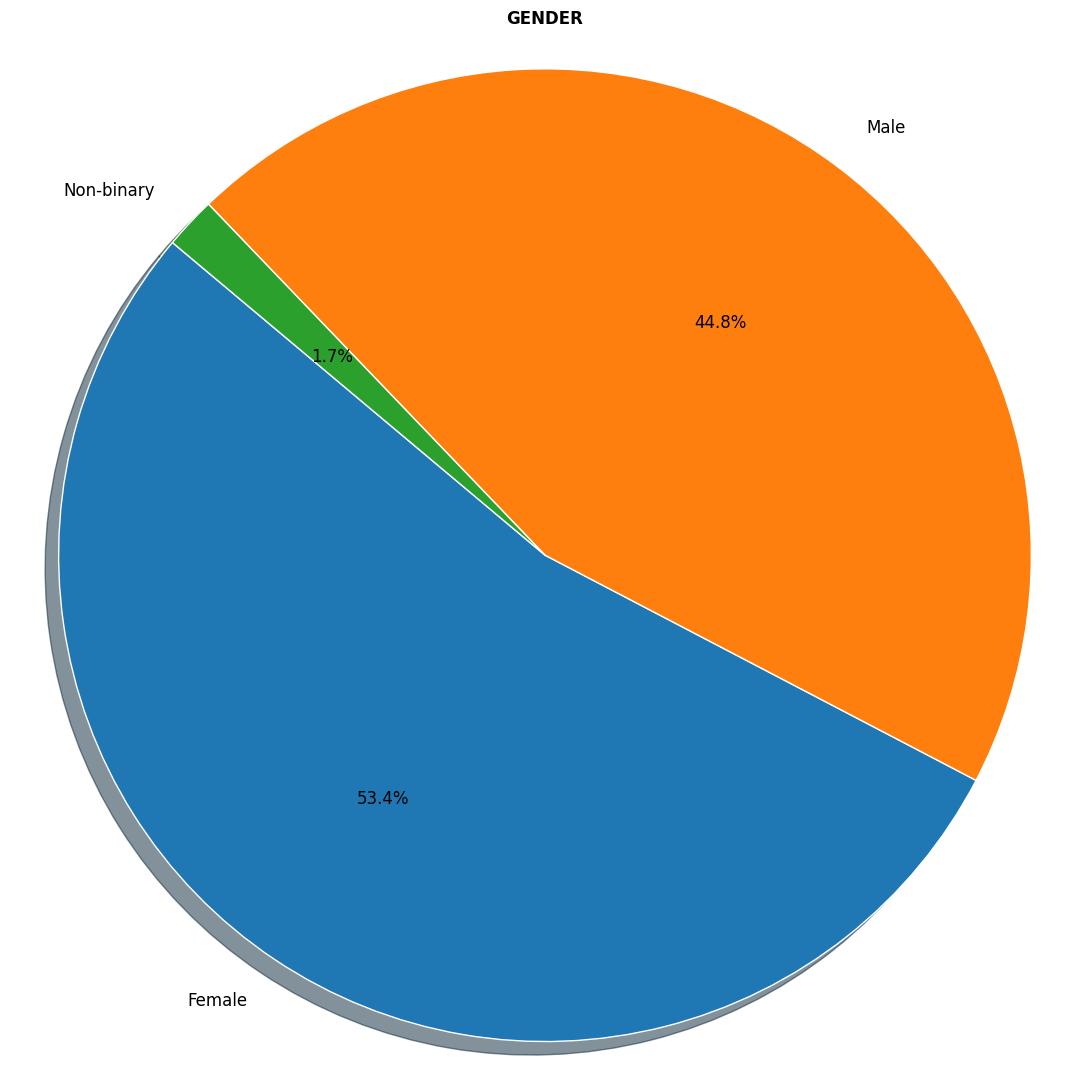

In [12]:
age = df['gender'].value_counts()
plt.figure(figsize=(11, 11))
plt.pie(
    age.values,
    labels=age.index,
    autopct='%1.1f%%',
    startangle=140,
 
    shadow=True,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('GENDER', fontsize=12, fontweight='bold')

plt.axis('equal') 
plt.tight_layout()
plt.show()



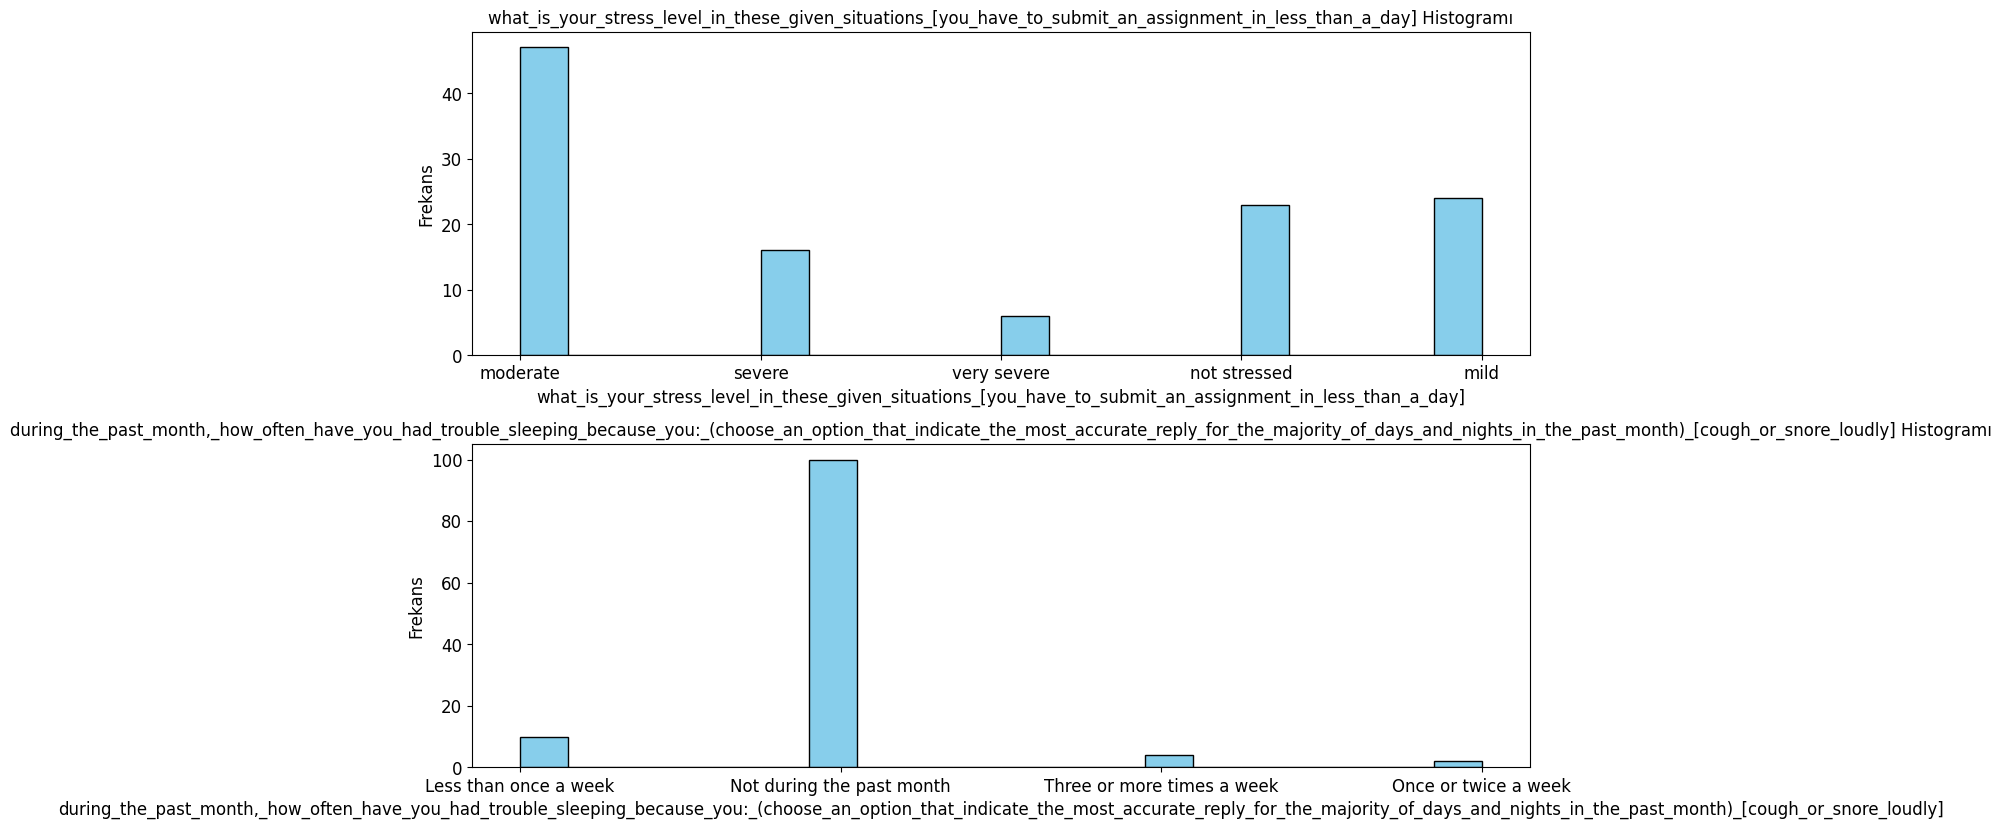

In [13]:
columns = ['what_is_your_stress_level_in_these_given_situations_[you_have_to_submit_an_assignment_in_less_than_a_day]','during_the_past_month,_how_often_have_you_had_trouble_sleeping_because_you:_(choose_an_option_that_indicate_the_most_accurate_reply_for_the_majority_of_days_and_nights_in_the_past_month)_[cough_or_snore_loudly]']
plt.figure(figsize=(12, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} Histogramı', fontsize=12)    
    plt.xlabel(col, fontsize=12)                      
    plt.ylabel('Frekans', fontsize=12)               
    plt.xticks(fontsize=12)                          
    plt.yticks(fontsize=12)                           

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'gender')

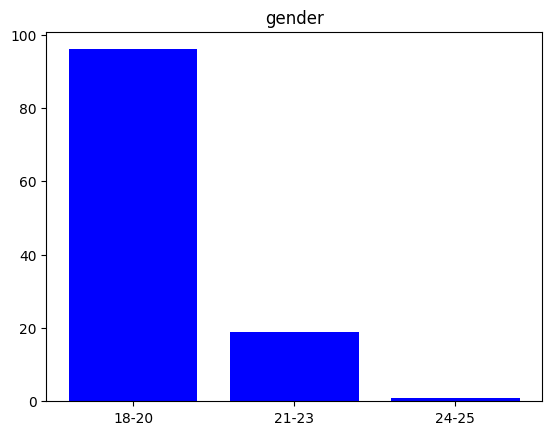

In [14]:
counts = df['age'].value_counts()

plt.bar(counts.index, counts.values, color='blue')
plt.title('gender')

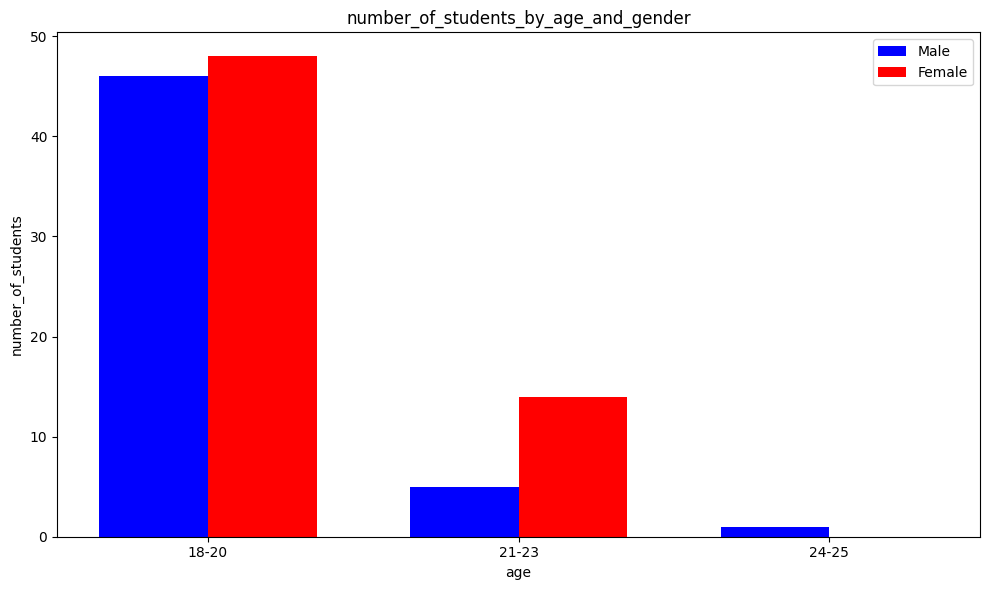

In [15]:
counts = pd.crosstab(df['age'], df['gender'])


bar_width = 0.35
ages = counts.index
x = np.arange(len(ages))


plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, counts['Male'], width=bar_width, label='Male', color='blue')
plt.bar(x + bar_width/2, counts['Female'], width=bar_width, label='Female', color='red')


plt.xlabel('age')
plt.ylabel('number_of_students')
plt.title('number_of_students_by_age_and_gender')
plt.xticks(x, ages)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion


**This notebook highlights a strong interplay between stress and sleep, backed by data. As project managers, students, professionals—or anyone balancing life pressures—understanding this connection can lead to healthier routines.**